The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0.000 sec. elapsed
(1444000,)
4000
(1444000,)
(1444000,)


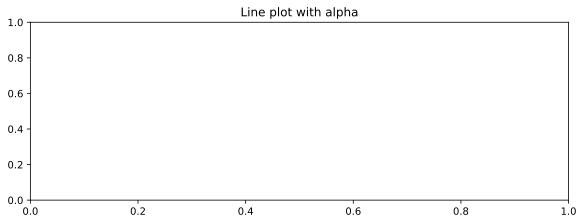

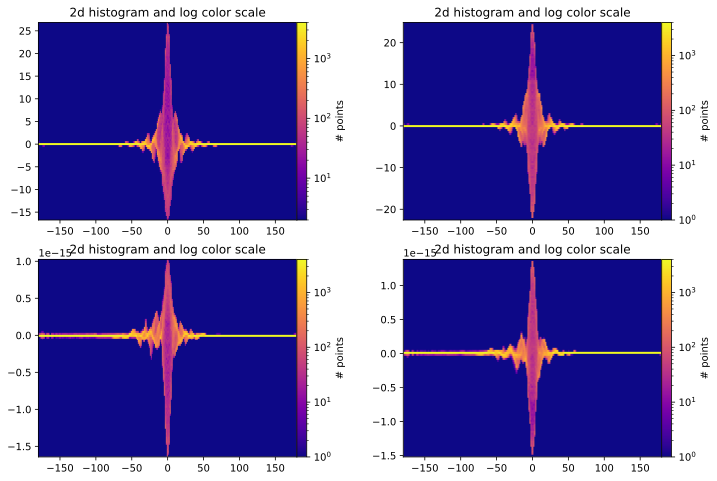

In [30]:
from copy import copy
import time

import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from ssapp.data.AntennaDatasetLoaders import load_serialized_dataset
from ssapp.Utils import FigureSaver
from torch.utils.data.dataloader import DataLoader

figSaver = FigureSaver('Dataset Visualisation',default_format='SVG')

dataset = load_serialized_dataset('CircularHornDataset1')

params, fields = next(iter(DataLoader(dataset,batch_size = len(dataset))))

%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
%load_ext autoreload
%autoreload 2

fig, axes = plt.subplots(nrows=1, figsize=(8, 3), constrained_layout=True)

# Make some data; a 1D random walk + small fraction of sine waves
num_series = 300
num_points = 100
SNR = 0.10  # Signal to Noise Ratio
x = np.linspace(-180,180, 361)
# Generate unbiased Gaussian random walks
Y = fields[:,:,0,0]

Y.shape
# Plot series using `plot` and a small value of `alpha`. With this view it is
# very difficult to observe the sinusoidal behavior because of how many
# overlapping series there are. It also takes a bit of time to run because so
# many individual artists need to be generated.
tic = time.time()
#axes.plot(x, Y.T, color="C0", alpha=0.1)
toc = time.time()
axes.set_title("Line plot with alpha")
print(f"{toc-tic:.3f} sec. elapsed")
x = np.array([x for y in range(len(Y))]).flatten()




# Now we will convert the multiple time series into a histogram. Not only will
# the hidden signal be more visible, but it is also a much quicker procedure.
tic = time.time()



# Plot (x, y) points in 2d histogram with log colorscale
# It is pretty evident that there is some kind of structure under the noise
print(x.shape)
print(len(Y))

print(x.shape)
print(Y.numpy().flatten().shape)
# You can tune vmax to make signal more visible
fig,axs = plt.subplots(ncols=2,nrows=2,figsize = (12,8))

titles = ['Cross ']

for idx,ax in enumerate(axs.flatten()):
    Y = fields[:,:,0,idx]
    cmap = copy(plt.cm.plasma)
    cmap.set_bad(cmap(0))
    h, xedges, yedges = np.histogram2d(x, Y.numpy().flatten(),bins=[361,100])
    pcm = ax.pcolormesh(xedges, yedges, h.T, cmap=cmap,
                            norm=LogNorm(), rasterized=True)
    fig.colorbar(pcm, ax=ax, label="# points", pad=0)
    ax.set_title("2d histogram and log color scale")






plt.show()

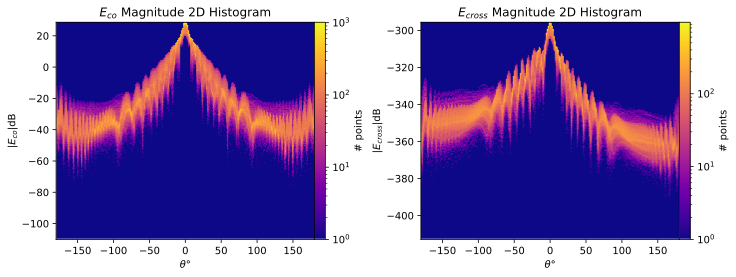

In [31]:
fig,axs = plt.subplots(ncols=2,nrows=1,figsize = (12,4))

mag = lambda a,b: 20*np.log10(np.sqrt(a**2+b**2))

titles = ['$E_{co}$ Magnitude 2D Histogram','$E_{cross}$ Magnitude 2D Histogram']
ylabel = ['$|E_{co}|$dB','$|E_{cross}|$dB']

for idx,ax in enumerate(axs.flatten()):
    Y = np.array([])
    
    Y = mag(fields[:,:,0,0+2*idx],fields[:,:,0,1+2*idx])

    cmap = copy(plt.cm.plasma)
    cmap.set_bad(cmap(0))
    h, xedges, yedges = np.histogram2d(x, Y.numpy().flatten(),bins=[361,300])
    pcm = ax.pcolormesh(xedges, yedges, h.T, cmap=cmap,
                            norm=LogNorm(), rasterized=True)
    fig.colorbar(pcm, ax=ax, label="# points", pad=0)
    ax.set_xlabel(r'$\theta\degree$')
    ax.set_ylabel(ylabel[idx])
    ax.set_title(titles[idx])



figSaver.save('CircularHornMagnitudeHistogram')

